这里显示逻辑回归相关的算法

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题

In [2]:
data = np.loadtxt("../data/2-logistic_regression/data2.txt", delimiter=",", dtype=np.float64) 
X = data[:,0:-1]
y = data[:,-1]

print ("the info.")
for i in range(10):
    print (" X: %s,Y: %d"%(X[i],y[i]))

the info.
 X: [ 0.051267  0.69956 ],Y: 1
 X: [-0.092742  0.68494 ],Y: 1
 X: [-0.21371  0.69225],Y: 1
 X: [-0.375    0.50219],Y: 1
 X: [-0.51325  0.46564],Y: 1
 X: [-0.52477  0.2098 ],Y: 1
 X: [-0.39804   0.034357],Y: 1
 X: [-0.30588 -0.19225],Y: 1
 X: [ 0.016705 -0.40424 ],Y: 1
 X: [ 0.13191 -0.51389],Y: 1


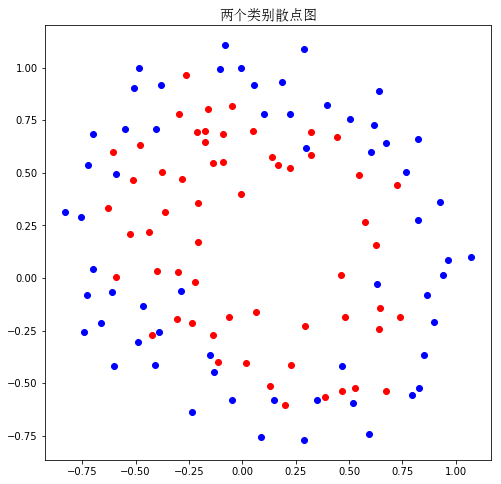

In [3]:
# 显示二维图形
def plot_data(X,y):
    pos = np.where(y==1)    
    neg = np.where(y==0)    
    #作图
    plt.figure(figsize=(8,8))
    plt.plot(X[pos,0],X[pos,1],'ro')        # red o
    plt.plot(X[neg,0],X[neg,1],'bo')        # blue o
    plt.title(u"两个类别散点图",fontproperties=font)
    plt.show()
plot_data(X,y) 

In [4]:
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    return A

In [5]:
# 映射为多项式 
def mapFeature(X1,X2):
    degree = 2;                     # 映射的最高次方
    out = np.ones((X1.shape[0],1))  # 映射后的结果数组（取代X）
    '''
    这里以degree=2为例，映射为1,x1,x2,x1^2,x1,x2,x2^2
    '''
    for i in np.arange(1,degree+1): 
        for j in range(i+1):
            temp = X1**(i-j)*(X2**j)    #矩阵直接乘相当于matlab中的点乘.*
            out = np.hstack((out, temp.reshape(-1,1)))
    return out

# S型函数    
def sigmoid(Z):
    A = 1.0/(1.0+np.exp(-Z))
    return A


#画决策边界
def plotDecisionBoundary(theta,X,y):
    pos = np.where(y==1)    #找到y==1的坐标位置
    neg = np.where(y==0)    #找到y==0的坐标位置
    #作图
    plt.figure(figsize=(8,8))
    plt.plot(X[pos,0],X[pos,1],'ro')        # red o
    plt.plot(X[neg,0],X[neg,1],'bo')        # blue o
    plt.title(u"决策边界",fontproperties=font)
    
    #u = np.linspace(30,100,100)
    #v = np.linspace(30,100,100)
    
    u = np.linspace(-1,1.5,50)  #根据具体的数据，这里需要调整
    v = np.linspace(-1,1.5,50)
    
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(u[i].reshape(1,-1),v[j].reshape(1,-1)),theta)    # 计算对应的值，需要map
    
    z = np.transpose(z)
    plt.contour(u,v,z,[0,0.01],linewidth=2.0)   # 画等高线，范围在[0,0.01]，即近似为决策边界
    #plt.legend()
    plt.show()


In [6]:
# 代价函数
def costFunction(initial_theta,X,y,inital_lambda):
    m = len(y)
    J = 0
    
    h = sigmoid(np.dot(X,initial_theta))    # 计算h(z)
    theta1 = initial_theta.copy()           # 因为正则化j=1从1开始，不包含0，所以复制一份，前theta(0)值为0 
    theta1[0] = 0   
    
    temp = np.dot(np.transpose(theta1),theta1)
    J = (-np.dot(np.transpose(y),np.log(h))-np.dot(np.transpose(1-y),np.log(1-h))+temp*inital_lambda/2)/m   # 正则化的代价方程
    return J

In [7]:
# 计算梯度
def gradient(initial_theta,X,y,inital_lambda):
    m = len(y)
    grad = np.zeros((initial_theta.shape[0]))
    
    h = sigmoid(np.dot(X,initial_theta))# 计算h(z)
    theta1 = initial_theta.copy()
    theta1[0] = 0

    grad = np.dot(np.transpose(X),h-y)/m+inital_lambda/m*theta1 #正则化的梯度
    return grad

In [8]:
# 预测
def predict(X,theta):
    m = X.shape[0]
    p = np.zeros((m,1))
    p = sigmoid(np.dot(X,theta))    # 预测的结果，是个概率值
    
    for i in range(m):
        if p[i] > 0.5:  #概率大于0.5预测为1，否则预测为0
            p[i] = 1
        else:
            p[i] = 0
    return p

[[ 0.69314718]]
Optimization terminated successfully.
         Current function value: 0.432431
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
在训练集上的准确度为83.050847%


C:\Users\Techik\Anaconda2\envs\gluon\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


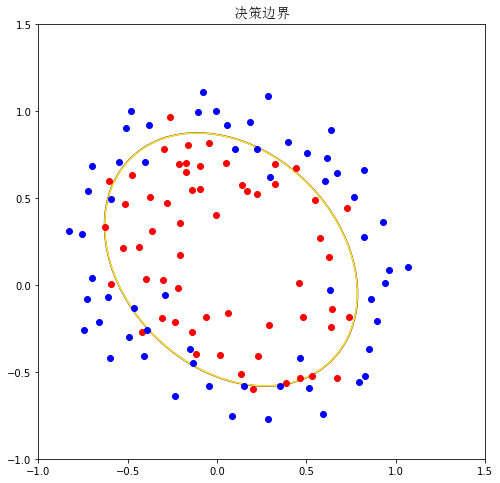

In [9]:
X = mapFeature(X[:,0],X[:,1])           #映射为多项式
initial_theta = np.zeros((X.shape[1],1))#初始化theta
initial_lambda = 0.1                    #初始化正则化系数，一般取0.01,0.1,1.....

J = costFunction(initial_theta,X,y,initial_lambda)  #计算一下给定初始化的theta和lambda求出的代价J

print J  #输出一下计算的值，应该为0.693147
#result = optimize.fmin(costFunction, initial_theta, args=(X,y,initial_lambda))    #直接使用最小化的方法，效果不好
'''调用scipy中的优化算法fmin_bfgs（拟牛顿法Broyden-Fletcher-Goldfarb-Shanno）
- costFunction是自己实现的一个求代价的函数，
- initial_theta表示初始化的值,
- fprime指定costFunction的梯度
- args是其余测参数，以元组的形式传入，最后会将最小化costFunction的theta返回 
'''
result = optimize.fmin_bfgs(costFunction, initial_theta, fprime=gradient, args=(X,y,initial_lambda))    
p = predict(X, result)   #预测
print u'在训练集上的准确度为%f%%'%np.mean(np.float64(p==y)*100)   # 与真实值比较，p==y返回True，转化为float   

X = data[:,0:-1]
y = data[:,-1]    
plotDecisionBoundary(result,X,y)    #画决策边界  